# SOCIAL ANXIETY PREVENTION RECOMMENDER

## PROBLEM STATEMENT 

With over 5 million Kenyans struggling with anxiety disorders, MindGuard revolutionizes mental health through an intelligent early-warning system. Using Feedforward Neural Networks to interpret complex behavioral patterns, MindGuard detects anxiety risks and delivers personalized preventative interventions, helping individuals maintain optimal mental wellness before clinical intervention becomes necessary.

## OBJECTIVES

1. Can we create an intelligent early-warning system that accurately predicts who is likely to experience anxiety problems, allowing for timely prevention and support?

2. How can we provide personalized lifestyle recommendations that are most likely to help individuals reduce their anxiety risk based on their unique profile?

3. Which lifestyle factors have the biggest impact on anxiety and how can these insights guide effective prevention strategies and public health initiatives?




## PLAN OF EXECUTION

- EDA 
- PREPROCESSING
- MODEL BUILDING
- MODEL INTERPRETATION 
- DEPLOYMENT



## EDA AND PREPROCESSING

### Load Dataset

In [114]:
#import needed libraries and load datasets to be used
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


enhanced_data = pd.read_csv('enhanced_anxiety_dataset.csv')
family_data = pd.read_csv('family_anxiety_14_dataset.csv')



### Perusing Data

Undersatanding what the data entails, conduct eda and preprocessing on the dataset

In [115]:
#Print first rows of enhanced anxiety dataset
enhanced_data.head()


,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [116]:
#Scheme the data types of the enhanced dataset
enhanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [117]:
#Summary stats for enhanced dataset
enhanced_data.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


In [118]:
#Check for missing values
enhanced_data.isnull().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

In [119]:
#Split data into features and target variable

X = enhanced_data.drop(columns='Anxiety Level (1-10)')
y = enhanced_data['Anxiety Level (1-10)']

#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [120]:
#Identify Categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns

In [121]:
# Define preprocessing steps for numerical and categorical features


preprocessing = ColumnTransformer(
    transformers=[ ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
)

# Create a pipeline with preprocessing and classifier
pipeline = Pipeline([
	('preprocessing', preprocessing),
	('classifier', RandomForestClassifier(random_state=42, class_weight= 'balanced'))
])



In [122]:
#Fit the pipeline to the training data
pipeline.fit(X_train,y_train)

#Test predictions and evaluate the model
y_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
test_accuracy

0.3513636363636364

In [123]:
y.value_counts()

Anxiety Level (1-10)
4.0     2416
3.0     2407
2.0     1756
5.0     1629
1.0     1039
6.0      616
8.0      363
9.0      329
10.0     322
7.0      123
Name: count, dtype: int64

In [124]:

from sklearn.model_selection import RandomizedSearchCV

# Use the correct parameter grid for the pipeline
param_grid_pipeline = {
	'classifier__n_estimators': [50, 100, 200],
	'classifier__max_depth': [None, 10, 20],
	'classifier__min_samples_split': [2, 5, 10],
	'classifier__min_samples_leaf': [1, 2, 4],
	'classifier__max_features': ['sqrt', 'log2', None]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = RandomizedSearchCV(pipeline, param_grid_pipeline, cv=3, n_jobs=1, scoring='f1_weighted', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)',
       'Therapy Sessions (per month)...
      dtype='object'))])),
                                             ('classifier',
                                              RandomForestClassifier(class_weight='balanced',
                                                                     random_state=42))]),
                   n_jobs=1,
                   param_distributions={'classifier__max_depth': [None, 10, 20],
                                        'classifier__max_features': ['sqrt',
                                                                     'log2',
                                                                     None],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [50, 100,
                                                                     200]},
                   scoring='f1_weighted', verbose=1)

In [125]:
print(grid_search.best_params_)


{'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': 20}


In [126]:
print(grid_search.best_score_)

0.3337176251983862


### EVALUATE THE MODEL

In [127]:
#Get the best mode and make predictions
best_model = grid_search.best_estimator_
y_trian_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)



In [128]:
#Calculate accuracies
train_accuracy = accuracy_score(y_train,y_trian_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
print(f"Train Accuracy: {train_accuracy: .4f}")
print(f"Test Accuracy: {test_accuracy: .4f}")
print(f"Difference in accuracy:{train_accuracy - test_accuracy: .4f}")


Train Accuracy:  0.9997
Test Accuracy:  0.3514
Difference in accuracy: 0.6483


In [129]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         1.0       0.41      0.35      0.38       208
         2.0       0.34      0.38      0.36       351
         3.0       0.33      0.35      0.34       481
         4.0       0.35      0.37      0.36       483
         5.0       0.36      0.43      0.39       326
         6.0       0.31      0.10      0.15       123
         7.0       0.00      0.00      0.00        25
         8.0       0.37      0.41      0.39        73
         9.0       0.35      0.27      0.31        66
        10.0       0.33      0.33      0.33        64

    accuracy                           0.35      2200
   macro avg       0.31      0.30      0.30      2200
weighted avg       0.35      0.35      0.34      2200



c:\Users\002401\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\002401\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\002401\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


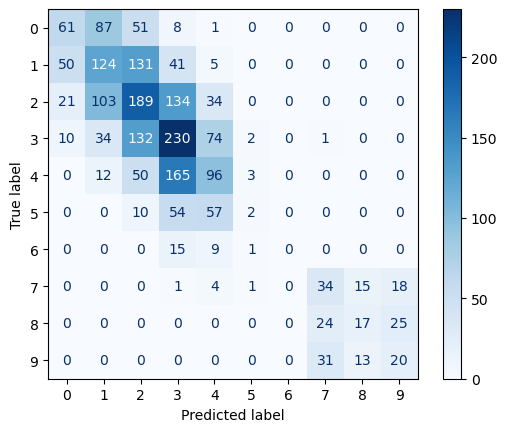

In [130]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
cfm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cfm).plot(cmap = 'Blues');

In [131]:
#Predict model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.3513636363636364


### FEATURE IMPORTANCE

In [132]:
#Get feature importances
feature_names = best_model.named_steps['preprocessing'].get_feature_names_out()
feature_importances = best_model.named_steps['classifier'].feature_importances_


In [133]:
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

# Display top 20 most important features
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))

Top 20 Most Important Features:
                                   feature  importance
5                 num__Stress Level (1-10)    0.126244
1                         num__Sleep Hours    0.099732
3            num__Caffeine Intake (mg/day)    0.087755
2        num__Physical Activity (hrs/week)    0.071322
6                    num__Heart Rate (bpm)    0.070967
0                                 num__Age    0.066111
9        num__Therapy Sessions (per month)    0.065367
7        num__Breathing Rate (breaths/min)    0.056625
10                num__Diet Quality (1-10)    0.056188
4   num__Alcohol Consumption (drinks/week)    0.055577
8                num__Sweating Level (1-5)    0.037417
13                       cat__Gender_Other    0.012032
27                         cat__Smoking_No    0.011866
12                        cat__Gender_Male    0.011776
36        cat__Recent Major Life Event_Yes    0.011770
11                      cat__Gender_Female    0.011733
33                      cat__Medi

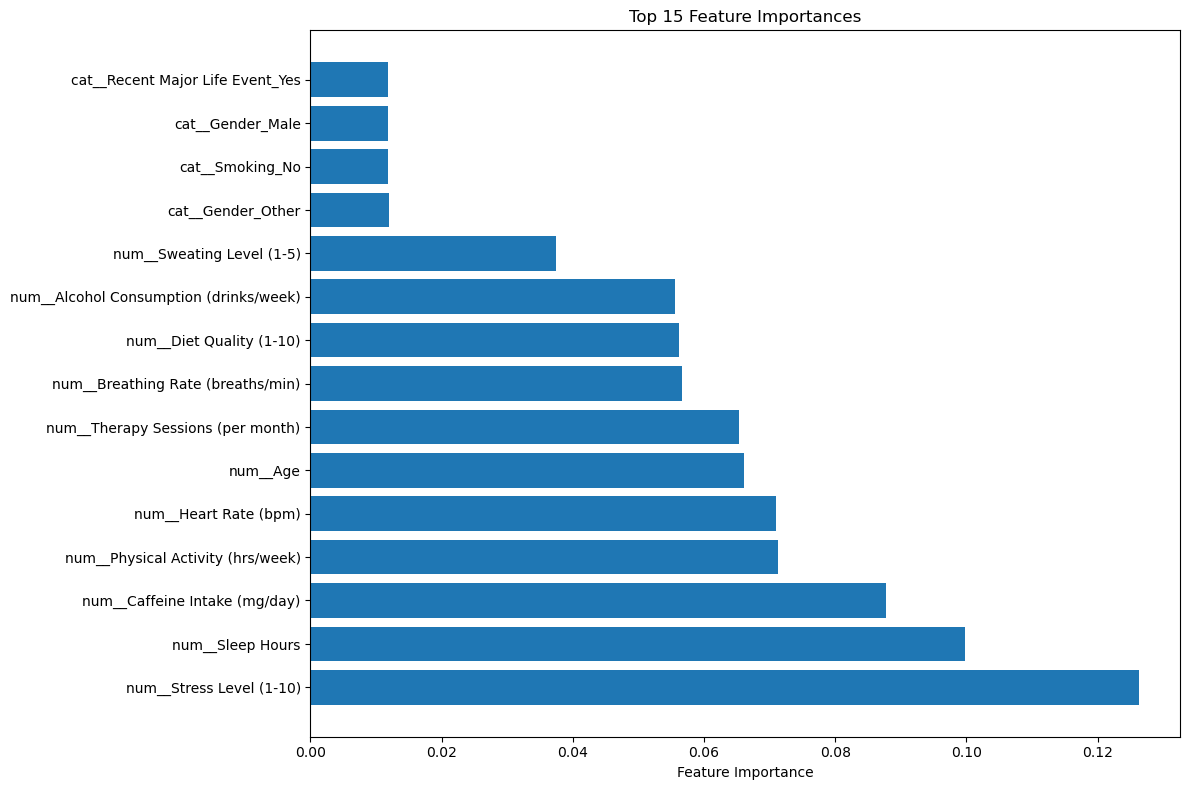

In [134]:
#Visualize feature importances
plt.figure(figsize=(12,8))
top_features = feature_importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

In [135]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.41      0.35      0.38       208
         2.0       0.34      0.38      0.36       351
         3.0       0.33      0.35      0.34       481
         4.0       0.35      0.37      0.36       483
         5.0       0.36      0.43      0.39       326
         6.0       0.31      0.10      0.15       123
         7.0       0.00      0.00      0.00        25
         8.0       0.37      0.41      0.39        73
         9.0       0.35      0.27      0.31        66
        10.0       0.33      0.33      0.33        64

    accuracy                           0.35      2200
   macro avg       0.31      0.30      0.30      2200
weighted avg       0.35      0.35      0.34      2200



c:\Users\002401\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\002401\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\002401\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [136]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

smote_pipeline = ImbPipeline([
    ('preprocessor', preprocessing),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

smote_pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)',
       'Therapy Sessions (per month)', 'Diet Quality (1-10)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
       'Dizziness', 'Medication', 'Recent Major Life Event'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [137]:
y_pred2 = smote_pipeline.predict(X_test)
test_accuracy2 = accuracy_score(y_test,y_pred2)
test_accuracy2

0.3513636363636364

## MODEL BUILDING 


## MODEL INTERPRETATION

## CONCLUSION 

## NEXT STEPS